In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("realestate.csv")
data.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
data.keys()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [13]:
data.shape

(414, 8)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [15]:
data.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


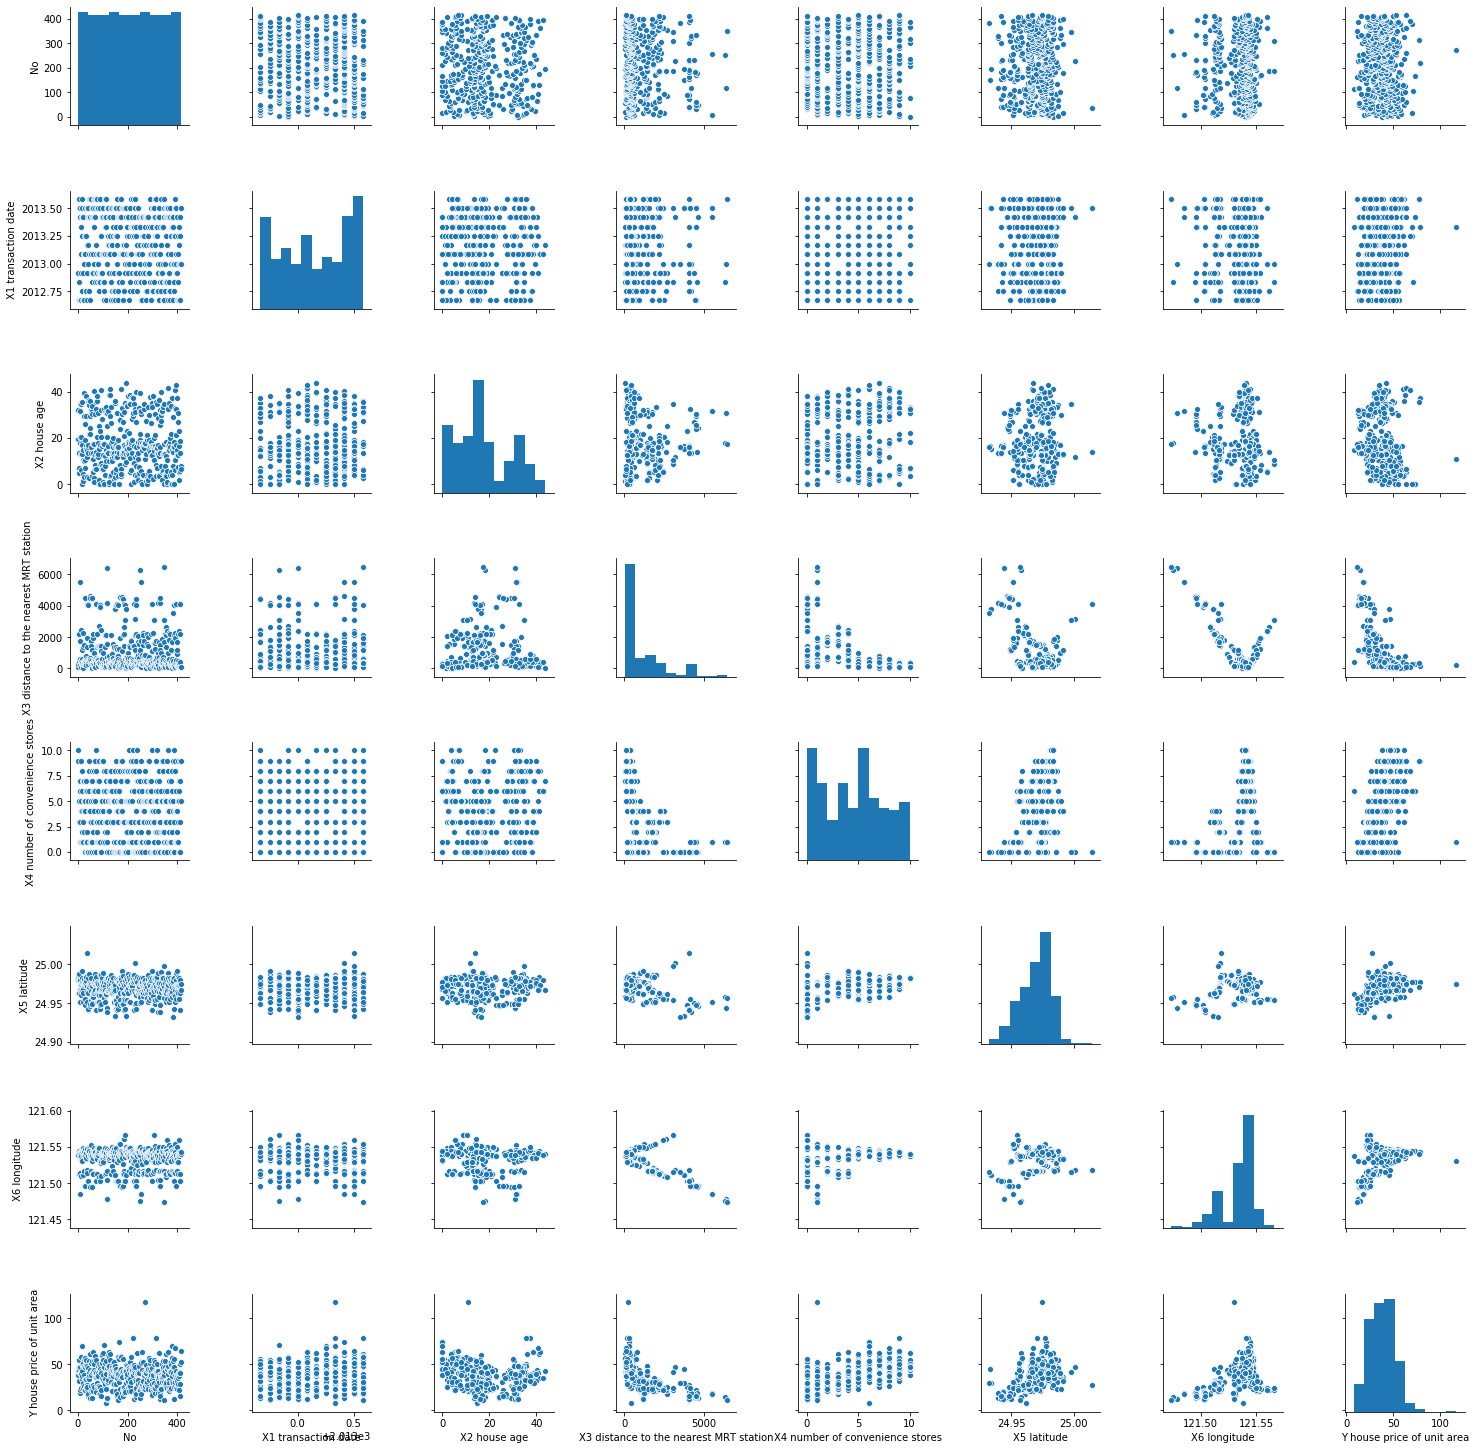

In [16]:
# data Visualization

sns.pairplot(data)

In [17]:
corrmat=data.corr()
corrmat

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


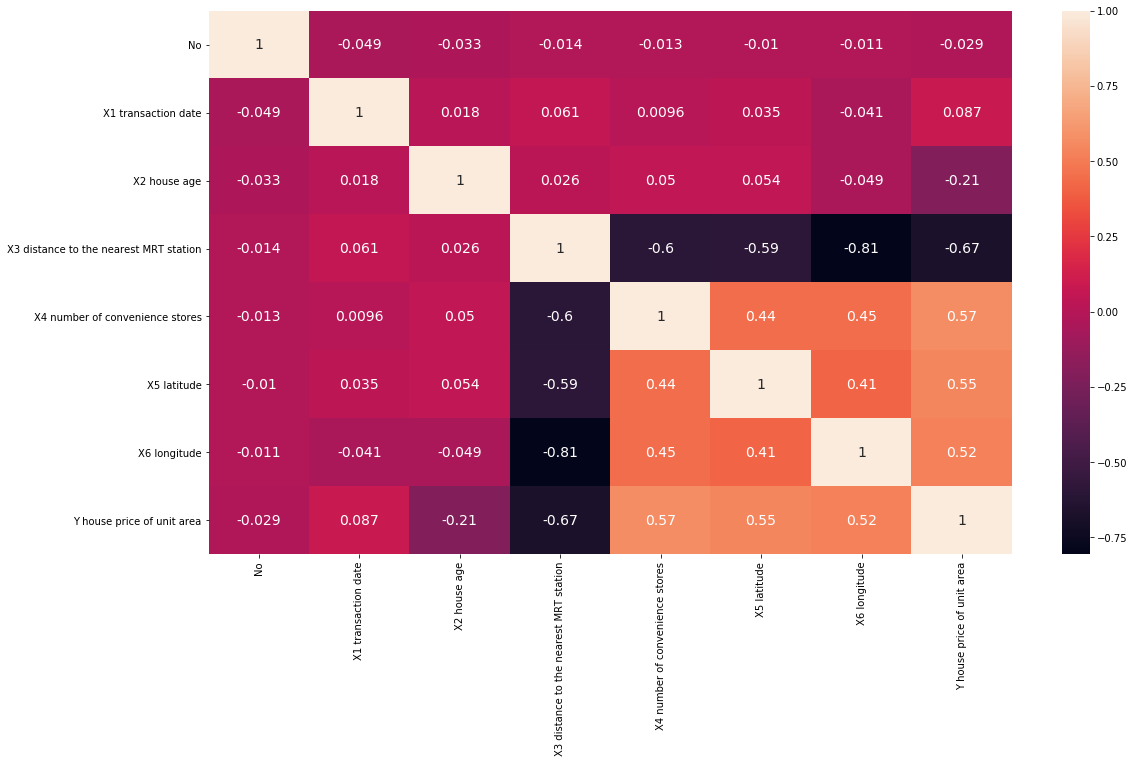

In [19]:
fig,x=plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':14})

In [20]:
def getCorrelatedValue(corrdata,threshold):
    features=[]
    value=[]
    for i,index in enumerate(corrdata.index):
        if(abs(corrdata[index])>threshold):
            features.append(index)
            value.append(corrdata[index])
    
    df=pd.DataFrame(data=value,index=features,columns=['Corr_value'])
    return df

In [23]:
threshold=0.55
corr_value=getCorrelatedValue(corrmat['Y house price of unit area'],threshold)
corr_value

,Corr_value
X3 distance to the nearest MRT station,-0.673613
X4 number of convenience stores,0.571005
Y house price of unit area,1.000000


In [24]:
correlated_data=data[corr_value.index]
correlated_data.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,84.87882,10,37.9
1,306.59470,9,42.2
2,561.98450,5,47.3
3,561.98450,5,54.8
4,390.56840,5,43.1


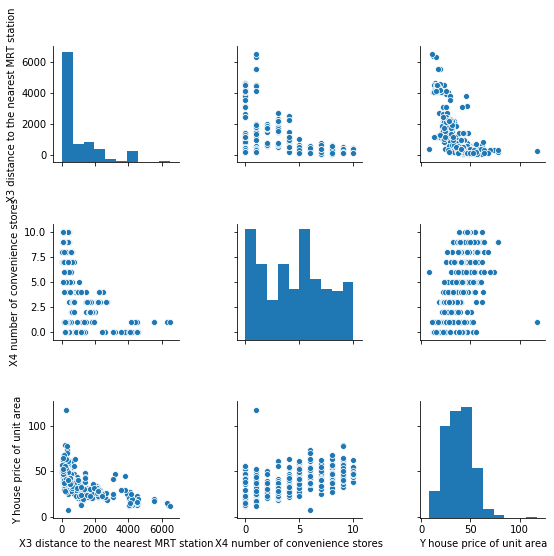

In [25]:
sns.pairplot(correlated_data)

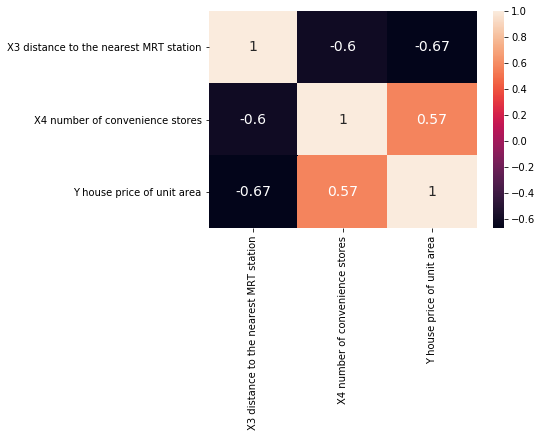

In [26]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':14})

In [27]:
X=correlated_data.drop(labels=['Y house price of unit area'],axis=1)
y=correlated_data['Y house price of unit area']
X.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(331, 2)
(83, 2)


In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [37]:
y_predict=model.predict(X_test)
y_predict

array([39.36299947, 14.21439622, 44.66602908, 14.25879227, 39.59320715,
       46.12949127, 46.70876478, 38.28729002, 46.10674231, 43.11507686,
       46.2651935 , 43.41772276, 39.49604327, 46.78163437, 45.02844337,
       39.48810883, 44.9160134 , 38.32081805, 42.55068638, 47.78819514,
       49.52766061, 32.98593701, 39.65770029, 43.67713956, 42.77823207,
       45.52877819, 46.33588486, 32.08818114, 43.11507686, 22.25196793,
       43.54628032, 34.69955251, 39.01565274, 38.50796307, 46.33588486,
       32.98593701, 50.54068265, 34.25059353, 49.10930964,  5.5277076 ,
       48.14802539, 38.65658573, 34.59542484, 50.60608424, 16.68858332,
       44.3816268 , 45.90211046, 16.77423321, 31.00222401, 47.34307168,
       49.52766061, 44.19532796, 48.32774804, 32.32898746, 32.98593701,
       40.94878669, 43.1523058 , 42.60327767, 46.2651935 , 34.69955251,
       45.42025266, 48.15624485, 38.10054627, 46.10674231, 45.43199992,
       30.77918033, 15.49721509, 34.92371241, 43.1523058 , 46.12

In [39]:
dff=pd.DataFrame(data=[y_predict,y_test],index=['predicted value','true value'])
dff.T

,predicted value,true value
0,39.362999,45.3
1,14.214396,14.4
2,44.666029,46.0
3,14.258792,15.6
4,39.593207,50.2
...,...,...
78,43.677140,53.0
79,38.740839,38.2
80,44.873322,46.7
81,32.985937,24.6


In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)

print('r2_score: ',score)
print('mean absolute error: ',mae)
print('mean squared error: ',mse)

r2_score:  0.5711791132527432
mean absolute error:  6.958578479235752
mean squared error:  74.48576474711162


In [45]:
total_features=[]
total_features_names=[]
selected_correlated_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]

In [46]:
def performance_metrics(features,th,y_true,y_pred):
    score=r2_score(y_true,y_predict)
    mae=mean_absolute_error(y_true,y_predict)
    mse=mean_squared_error(y_true,y_predict)
    
    total_features.append(len(features)-1)
    total_features_names.append(str(features))
    selected_correlated_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics=pd.DataFrame(data=[total_features_names,total_features,selected_correlated_value,r2_scores,mae_value,mse_value],index=['feature names','features','threshold','r2_score','MAE','MSE'])
    return metrics

    

In [47]:
performance_metrics(correlated_data.columns,threshold,y_test,y_predict)

,0
feature names,Index(['X3 distance to the nearest MRT station...
features,2
threshold,0.55
r2_score,0.571179
MAE,6.95858
MSE,74.4858


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

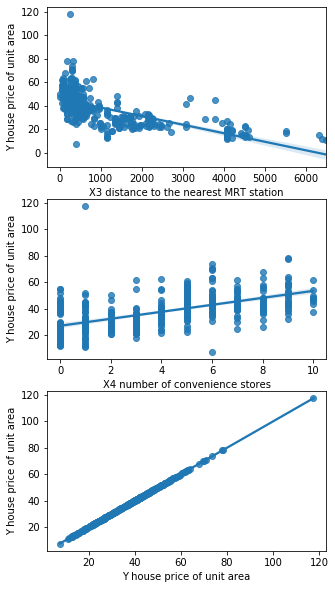

In [62]:
rows=3
cols=1
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(5,10),squeeze=False)

col=correlated_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(correlated_data[col[index]],correlated_data['Y house price of unit area'],ax=ax[i][j])
        index=index+1
plt.tight_layout